## Netflix TV Shows and Movies Dataset
### by Abanoub Girgis

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Data Cleaning

In [2]:
#loading in the data into a pandas dataframe
credits_df = pd.read_csv("credits.csv")
titles_df = pd.read_csv("titles.csv")

## We will start by exporing the credits dataframe

In [3]:
#Viewing the first 5 rows of the credits df
credits_df.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [4]:
#Viewing the dimensions of the credits dataframe 
credits_df.shape

(77213, 5)

In [5]:
# Using the infos method to display the data type for each column
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77213 entries, 0 to 77212
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77213 non-null  int64 
 1   id         77213 non-null  object
 2   name       77213 non-null  object
 3   character  67586 non-null  object
 4   role       77213 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.9+ MB


In [6]:
# Checking for null values
credits_df.isna().sum()

person_id       0
id              0
name            0
character    9627
role            0
dtype: int64

### The character column contains null values, so we need to check why that is the case

In [7]:
mask = credits_df.isna().any(axis=1)
credits_df[mask]

,person_id,id,name,character,role
36,3308,tm84618,Martin Scorsese,NaN,DIRECTOR
83,11475,tm127384,Terry Jones,NaN,DIRECTOR
84,11473,tm127384,Terry Gilliam,NaN,DIRECTOR
99,548006,tm70993,Peter Brett,NaN,ACTOR
106,11475,tm70993,Terry Jones,NaN,DIRECTOR
...,...,...,...,...,...
77192,1975318,tm1045018,Derel Isaac,NaN,ACTOR
77194,1975627,tm1045018,Chealse Howell,NaN,ACTOR
77197,363804,tm1045018,Pascal Atuma,NaN,DIRECTOR
77203,530811,tm1098060,Toyin Aimakhu-Johnson,NaN,ACTOR


#### We notice that directors usually don't play a character in the Shows/Movies, with some actors missing the character details, for the purpose of our invistigation we decided to drop ther charcter column

In [8]:
#Dropping the character column in the credits dataframe
credits_df.drop(["character"], axis=1, inplace = True)

In [9]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77213 entries, 0 to 77212
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77213 non-null  int64 
 1   id         77213 non-null  object
 2   name       77213 non-null  object
 3   role       77213 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.4+ MB


In [10]:
credits_df.isna().sum()

person_id    0
id           0
name         0
role         0
dtype: int64

### Now our dataframe is free of null values

In [11]:
# Check for duplicate data
credits_df.duplicated().any()

True

In [12]:
credits_df.duplicated().sum()

91

In [13]:
credits_df[credits_df.duplicated()]

,person_id,id,name,role
77,11475,tm127384,Terry Jones,ACTOR
1380,479070,tm126769,José Andrada,ACTOR
4077,135051,tm52083,Carmen Lebbos,ACTOR
5407,82074,tm78671,Terry Milam,ACTOR
7262,39337,ts35155,Takako Honda,ACTOR
...,...,...,...,...
74030,53957,ts287853,Nilton Martins,ACTOR
74372,187107,tm1070032,Jodie Leslie Ahlborn,ACTOR
74809,283564,tm1049290,Jowita Budnik,ACTOR
75578,366269,tm1000185,Izabela Dąbrowska,ACTOR


### The dataset is contains diplicate data, mostly of actors playing the 2 different roles in movieataset is free of diplicate data

In [14]:
credits_df.drop_duplicates(inplace=True)

In [15]:
# Check for duplicate data
credits_df.duplicated().any()

False

### Now our dataset is free of duplicate values

In [16]:
credits_df.shape

(77122, 4)

## Now we will be exploring the titles dataframe

In [17]:
#Viewing the first 5 rows of the titles df
titles_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [18]:
#Viewing the dimensions of the titles dataframe 
titles_df.shape

(5806, 15)

In [19]:
# Using the infos method to display the data type for each column
titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

In [20]:
titles_df.isna().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64

#### We don't need the description column or the imdb_id in our analysis so we decieded to drop it

In [21]:
titles_df.drop(["description", "imdb_id"], axis=1, inplace = True)

In [22]:
titles_df.duplicated().any()

False

In [23]:
titles_df['title'].duplicated().sum()

54

## We see that some titles are duplicated and will have different scores, so we decided to drop these rows to avoid inaccuracies

In [24]:
titles_df.drop_duplicates(subset=['title'], inplace=True)

## we noticed that we have 2 types of data, shows and movies so we decided to split the dataframe into 2 dataframes

### For the shows

In [25]:
titles_df_shows = titles_df[titles_df["type"] == "SHOW"]

In [26]:
titles_df_shows.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,0.600,NaN
5,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,8.8,72895.0,12.919,8.3
29,ts45948,Monty Python's Fliegender Zirkus,SHOW,1972,TV-MA,43,['comedy'],[],1.0,8.1,2144.0,1.490,7.0
47,ts20681,Seinfeld,SHOW,1989,TV-PG,24,['comedy'],['US'],9.0,8.9,302700.0,128.743,8.3
55,ts22082,Knight Rider,SHOW,1982,TV-PG,51,"['action', 'scifi', 'crime', 'drama']",['US'],4.0,6.9,33760.0,44.378,7.5


In [27]:
titles_df_shows.shape

(2022, 13)

In [28]:
titles_df_shows.isna().sum()

id                        0
title                     0
type                      0
release_year              0
age_certification       255
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_score              167
imdb_votes              167
tmdb_popularity          33
tmdb_score              132
dtype: int64

### since the null values is a small percentage of our data, we decided to drop all the rows containing null values

In [29]:
titles_df_shows.dropna(inplace=True)

<ipython-input-29-29fb54958968>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles_df_shows.dropna(inplace=True)


In [30]:
titles_df_shows.isna().sum()

id                      0
title                   0
type                    0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

In [31]:
titles_df_shows.shape

(1579, 13)

#### Now our shows dataframe is clean of null values and can be worked on

### For the movies

In [32]:
titles_df_movies = titles_df[titles_df["type"] == "MOVIE"]

In [33]:
titles_df_movies.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,8.1,391942.0,95.337,7.7
6,tm14873,Dirty Harry,MOVIE,1971,R,102,"['thriller', 'crime', 'action']",['US'],NaN,7.7,153463.0,14.745,7.5


In [34]:
titles_df_movies.shape

(3730, 13)

In [35]:
titles_df_movies.isna().sum()

id                         0
title                      1
type                       0
release_year               0
age_certification       2334
runtime                    0
genres                     0
production_countries       0
seasons                 3730
imdb_score               351
imdb_votes               367
tmdb_popularity           58
tmdb_score               183
dtype: int64

#### The movies dataframe does not contain seasons thus we can drop this column

In [36]:
titles_df_movies.drop(["seasons"], axis=1 , inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [37]:
titles_df_movies.isna().sum()

id                         0
title                      1
type                       0
release_year               0
age_certification       2334
runtime                    0
genres                     0
production_countries       0
imdb_score               351
imdb_votes               367
tmdb_popularity           58
tmdb_score               183
dtype: int64

### We noticed that there is only 1 title with missing value

In [38]:
# Replacing the missing title with the string "No Title"
titles_df_movies["title"] = titles_df_movies["title"].fillna("No Title")

<ipython-input-38-2713c083609e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles_df_movies["title"] = titles_df_movies["title"].fillna("No Title")


In [39]:
titles_df_movies.isna().sum()

id                         0
title                      0
type                       0
release_year               0
age_certification       2334
runtime                    0
genres                     0
production_countries       0
imdb_score               351
imdb_votes               367
tmdb_popularity           58
tmdb_score               183
dtype: int64

### For the movies dataframe we noticed that most of the rows are missing their age_certification data, thus we decided to drop that column

In [40]:
titles_df_movies.drop(["age_certification"], axis=1, inplace=True)

### We will then count the unique rows that contain null data

In [41]:
titles_df_movies.isna().any(axis=1).sum()

500

In [42]:
titles_df_movies.isna().any(axis=1).sum()/titles_df_movies.shape[0] * 100

13.404825737265416

### Since the percentage of rows that contain null values is insignificant we decided to drop these rows

In [43]:
titles_df_movies.dropna(inplace=True)

<ipython-input-43-44e05207624c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles_df_movies.dropna(inplace=True)


In [44]:
titles_df_movies.isna().sum()

id                      0
title                   0
type                    0
release_year            0
runtime                 0
genres                  0
production_countries    0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

In [45]:
titles_df_movies.shape

(3230, 11)

What is the structure of the datasets?
> Originally the credits dataset contained 77213 and after cleaning the data it contained 77122 rows.

> Originally the Shows dataset contained 2022 and after cleaning the data it contained 1579 rows.

> Originally the Movies dataset contained 3730 and after cleaning the data it contained 3230 rows.

### Now that we have cleaned the data we can begin analyzing  and come out with our conclusions

# Data Analysis

### Statistical Analysis for Numerical Values

In [46]:
titles_df_shows.describe().drop("count", axis = 0)

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
mean,2017.063965,38.599747,2.362888,7.046992,2.012260e+04,34.31170,7.486510
std,5.327104,17.365982,2.889282,1.056776,7.628764e+04,93.28583,1.043102
min,1969.000000,0.000000,1.000000,1.600000,6.000000e+00,0.60000,1.000000
25%,2016.000000,24.000000,1.000000,6.500000,5.880000e+02,5.07150,7.000000
50%,2018.000000,41.000000,1.000000,7.200000,2.285000e+03,12.25900,7.500000
75%,2020.000000,49.000000,3.000000,7.800000,9.107000e+03,27.73750,8.100000
max,2022.000000,178.000000,42.000000,9.500000,1.727694e+06,1455.08500,10.000000


In [47]:
titles_df_movies.describe().drop("count", axis = 0)

,release_year,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
mean,2015.088235,101.882972,6.265789,2.778832e+04,20.321873,6.439319
std,8.332028,27.496647,1.106857,9.676152e+04,61.974409,1.014797
min,1953.000000,8.000000,1.700000,5.000000e+00,0.600000,1.000000
25%,2014.000000,88.000000,5.600000,7.010000e+02,3.236500,5.900000
50%,2018.000000,100.000000,6.400000,2.949000e+03,7.366000,6.500000
75%,2020.000000,116.000000,7.100000,1.346325e+04,16.010250,7.100000
max,2022.000000,235.000000,9.000000,2.268288e+06,1823.374000,10.000000


### Statistical Analysis for Categorical Values

In [48]:
credits_df.describe(include= [np.object]).drop("count", axis = 0)

,id,name,role
unique,5434,53687,2
top,tm32982,Shah Rukh Khan,ACTOR
freq,208,30,72599


In [49]:
titles_df_shows.describe(include= [np.object]).drop("count", axis = 0)

,id,title,type,age_certification,genres,production_countries
unique,1579,1579,1,6,694,92
top,ts112733,Away,SHOW,TV-MA,['reality'],['US']
freq,1,1,1579,759,81,657


In [50]:
titles_df_movies.describe(include= [np.object]).drop("count", axis = 0)

,id,title,type,genres,production_countries
unique,3230,3230,1,1013,382
top,tm213681,Semesta,MOVIE,['comedy'],['US']
freq,1,1,3230,337,1080


## Data Exploration

### For this Analysis We decided to focus on the following questions

> 1) What is the relationship between release year and the number of movies/shows released?

> 2) What are the top movies/shows of all Time according to IMDB and TMDB?

> 3) Who is the actor who appeared in most movies/shows?

> 4) Who is the actor that had the highest movie/shows ratings?

> 5) What is the relationship between genre and year?

> 6) What is the relationship between tmdb_popularity and age_certification for shows?

> 7) Who is the director who directed the most movies/shows?

> 8) What is the relationship between directors and rating?

> 9) What is the relationship between country and the count of movies/shows?

> 10) What is the movies/shows with the most and least number of votes?

> 11) What is the relationship between release year and popularity?

> 12) What is the relationship between the number of seasons and run time of the show?

### 1) What is the relationship between release year and the number of movies/shows released?


In [51]:
shows_graph = titles_df_shows['release_year'].value_counts().sort_index()
movies_graph = titles_df_movies['release_year'].value_counts().sort_index()

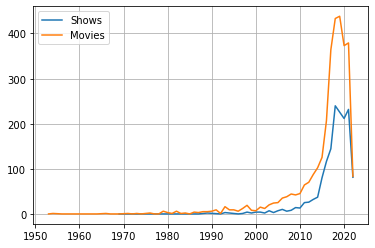

In [52]:
fig, ax = plt.subplots()
ax.plot(shows_graph.index, shows_graph.values, label="Shows")
ax.plot(movies_graph.index, movies_graph.values, label="Movies")

plt.grid(True)
plt.legend()
plt.show()

## We can conclude the following:
- The count of releasd tends to increase per year
- The count peaked on 2021
- There is a drop in count after 2022, which can be explained by the data collection being done in the middle of of 2022 and thus resulting in the data being incomplete.

### 2) What are the top movies/shows of all Time according to IMDB and TMDB?


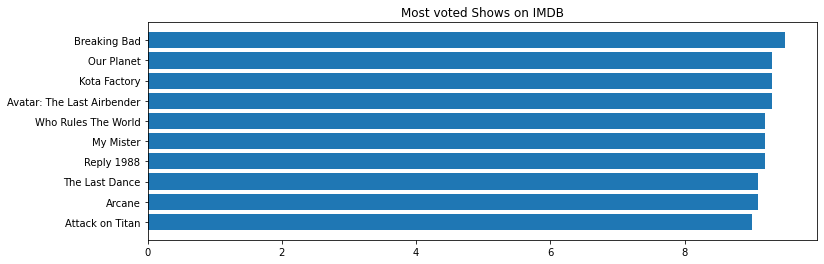

In [53]:
plt.figure(figsize=(12,4))
plt.barh(titles_df_shows.sort_values('imdb_score', ascending=True)['title'].tail(10),titles_df_shows.sort_values('imdb_score', ascending=True)['imdb_score'].tail(10), align='center')
plt.title("Most voted Shows on IMDB")
plt.show()

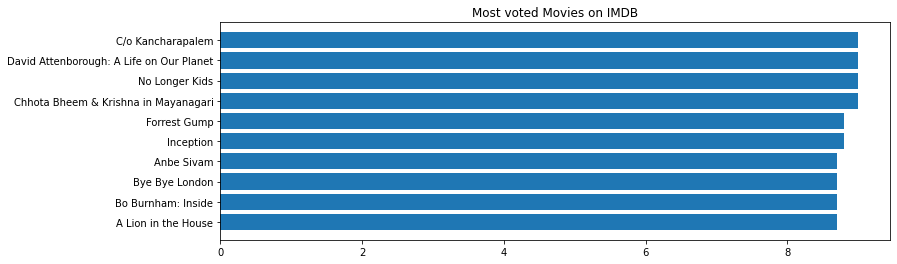

In [54]:
plt.figure(figsize=(12,4))
plt.barh(titles_df_movies.sort_values('imdb_score', ascending=True)['title'].tail(10),titles_df_movies.sort_values('imdb_score', ascending=True)['imdb_score'].tail(10), align='center')
plt.title("Most voted Movies on IMDB")
plt.show()

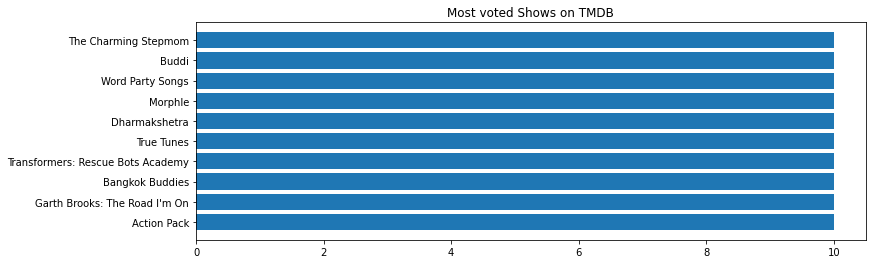

In [55]:
plt.figure(figsize=(12,4))
plt.barh(titles_df_shows.sort_values('tmdb_score', ascending=True)['title'].tail(10),titles_df_shows.sort_values('tmdb_score', ascending=True)['tmdb_score'].tail(10), align='center')
plt.title("Most voted Shows on TMDB")
plt.show()

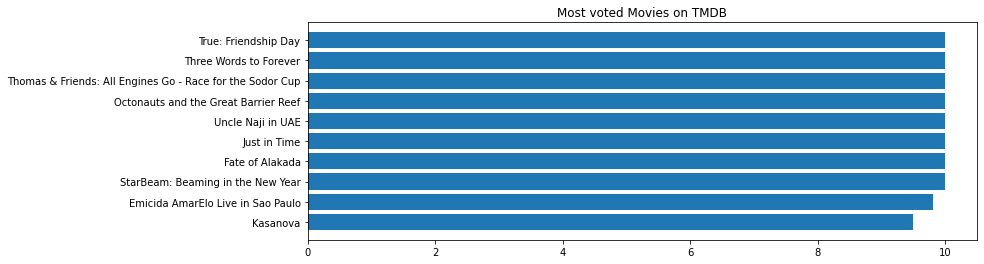

In [56]:
plt.figure(figsize=(12,4))
plt.barh(titles_df_movies.sort_values('tmdb_score', ascending=True)['title'].tail(10),titles_df_movies.sort_values('tmdb_score', ascending=True)['tmdb_score'].tail(10), align='center')
plt.title("Most voted Movies on TMDB")
plt.show()

## We can conclude the following:
- According to IMDB, Breaking Bad is the highest rated show and C/o Kancharapalem is the highest rated movie, TMDB however has a number of ties.
- IMDB has a more varied score range.
- IMDB users are less likely than TMDB to give a show/movie perfect ratings

### 3) Who is the actor who appeared in most movies/shows?


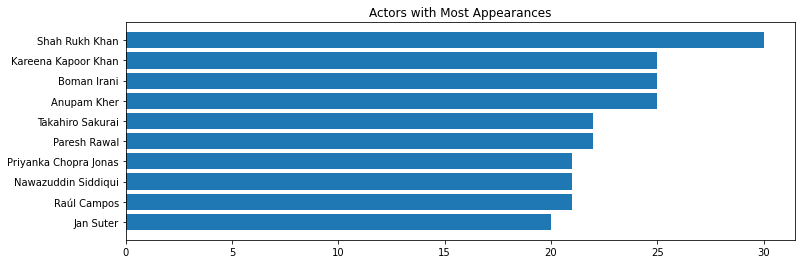

In [57]:
plt.figure(figsize=(12,4))
plt.barh(credits_df['name'].value_counts(ascending=True).tail(10).index,credits_df['name'].value_counts(ascending=True).tail(10).values, align='center')
plt.title("Actors with Most Appearances")
plt.show()

## We can conclude the following:
- Shah Rukh Khan is the actor who appeared the most at 30 appearances in the datasets.
- Most of the actors on the graph appear to be East Asian


### 4) Who is the actor that had the highest movie/shows ratings?


In [58]:
credits_df_ratings = credits_df[credits_df['role'] == 'ACTOR']

In [59]:
# First we merge the 2 datasets and groupby the actor's name to get their average rating and drop the actors that don't have ratings
credits_df_ratings = pd.merge(credits_df_ratings, titles_df, on="id", how="inner")[['name', 'title', 'imdb_score', 'tmdb_score']].groupby('name').mean().reset_index().dropna()

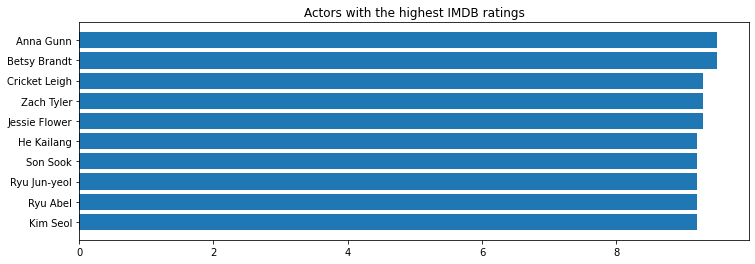

In [60]:
plt.figure(figsize=(12,4))
plt.barh(credits_df_ratings.sort_values('imdb_score', ascending=True)['name'].tail(10),credits_df_ratings.sort_values('imdb_score', ascending=True)['imdb_score'].tail(10), align='center')
plt.title("Actors with the highest IMDB ratings")
plt.show()

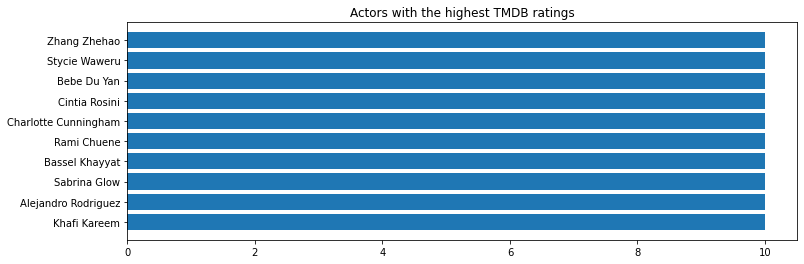

In [61]:
plt.figure(figsize=(12,4))
plt.barh(credits_df_ratings.sort_values('tmdb_score', ascending=True)['name'].tail(10),credits_df_ratings.sort_values('tmdb_score', ascending=True)['tmdb_score'].tail(10), align='center')
plt.title("Actors with the highest TMDB ratings")
plt.show()

## We can conclude the following:
- Anna Gunn has the highest ratings in IMDB, while TMDB has a number of ties.
- We also see a similar conclusion to the previous one about the ratings (see question 2)

### 5) What is the relationship between genre and year?


In [62]:
# First we convert the genres object to a list
from ast import literal_eval
genres_df = titles_df[['genres', 'release_year']]
genres_df['genres'] = titles_df['genres'].apply(lambda x: literal_eval(x))

<ipython-input-62-1656402a927b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_df['genres'] = titles_df['genres'].apply(lambda x: literal_eval(x))


In [63]:
# We explode the genres list so we have separate columns to work with
genres_df = genres_df.explode('genres')

In [64]:
# we count the occurances of each genre per year
genres_df['Count'] = 1
genres_df = genres_df.groupby(['genres', 'release_year']).Count.count().reset_index()


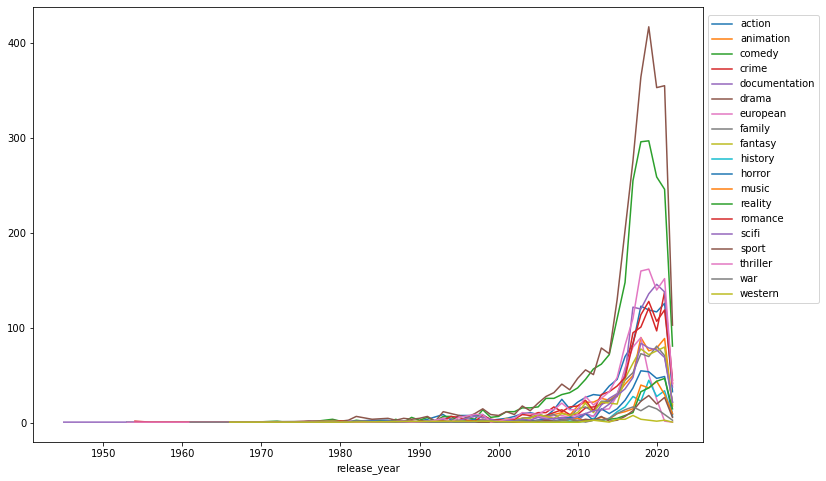

In [65]:
# finally we group the resulting dataframe by genre
genres_df.set_index('release_year', inplace=True)
plt.figure(figsize=(12,8))
ax = plt.subplot(111)
genres_df.groupby('genres')['Count'].plot(legend=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.65))
plt.show()

## We can conclude the following:
- Drama seems to be the most popular genre of all time, followed by comedy.
- There is a large gap between the top 2 genres and the rest of the genres in the dataset.

### 6) What is the relationship between tmdb_popularity and age_certification for shows?


In [66]:
# Grouping by Age Certification and getting the mean popularity value of each
titles_df_shows_certification_popularity = titles_df_shows.groupby('age_certification')['tmdb_popularity'].mean()

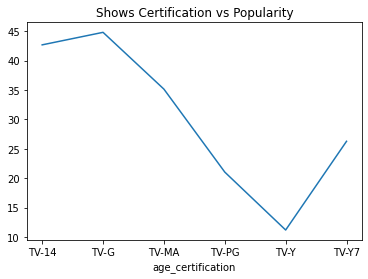

In [67]:
titles_df_shows_certification_popularity.plot()
plt.title("Shows Certification vs Popularity")
plt.show()

## We can conclude the following:
- The most Popular show age certification is TV-G followed closely by TV-14, and the least popular is TV-Y
- This is not surpising considering TV-G is "Suitable for General Audience" and thus everyone would watch the shows
- Unlike TV-Y which is "Suitable for Young Kids" which is only watched by younger kids for a couple of hours a day

### 7) Who is the director who directed the most movies/shows?


In [68]:
# First we filter the credits df for only Directors
directors_df = credits_df[credits_df['role'] == 'DIRECTOR']

In [69]:
directors_df['Count'] = 1
directors_df = pd.merge (directors_df, titles_df, on="id", how="inner")

<ipython-input-69-b3bcb165f9ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  directors_df['Count'] = 1


In [70]:
directors_df = directors_df [['name', 'id', 'Count']].groupby('name'). Count.count().reset_index()

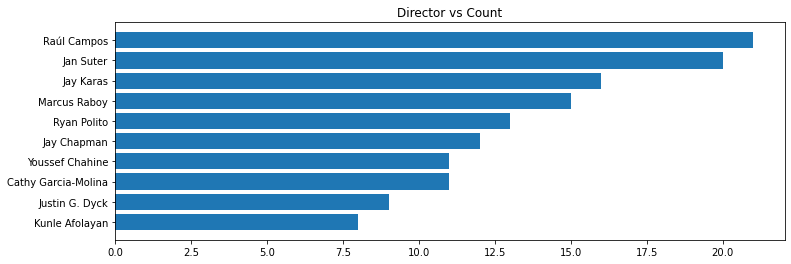

In [71]:
plt.figure(figsize=(12,4))
plt.barh(directors_df.sort_values('Count', ascending=True)['name'].tail(10),directors_df.sort_values('Count', ascending=True)['Count'].tail(10), align='center')
plt.title("Director vs Count")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54728 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50980 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47924 missing from curre

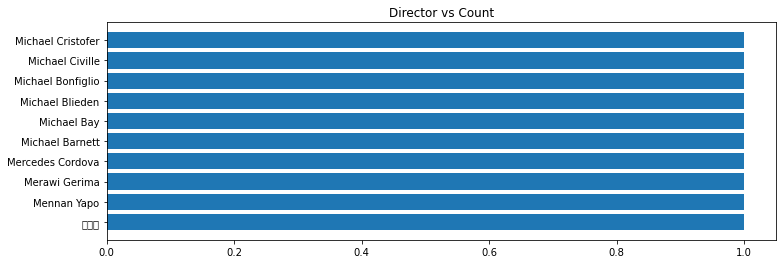

In [72]:
plt.figure(figsize=(12,4))
plt.barh(directors_df.sort_values('Count', ascending=True)['name'].head(10),directors_df.sort_values('Count', ascending=True)['Count'].head(10), align='center')
plt.title("Director vs Count")
plt.show()

## We can conclude the following:
- Raul Campos directed the largest number of movies/shows followed by Jan Sutar
- We see that the directors who directed the least number of movies are all tied at 1 movie each.

### 8) What is the relationship between directors and rating?


In [73]:
# First we filter the credits df for only Directors
directors_df_rating = credits_df[credits_df['role'] == 'DIRECTOR']

In [74]:
# First we merge the 2 datasets and groupby the actor's name to get their average rating and drop the actors that don't have ratings
directors_df_rating = pd.merge(directors_df_rating, titles_df, on="id", how="inner")[['name', 'title', 'imdb_score', 'tmdb_score']].groupby('name').mean().reset_index().dropna()

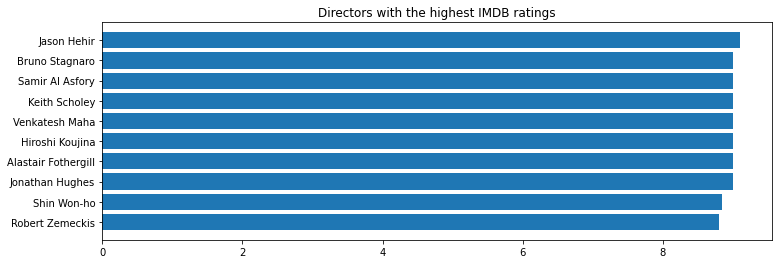

In [75]:
plt.figure(figsize=(12,4))
plt.barh(directors_df_rating.sort_values('imdb_score', ascending=True)['name'].tail(10),directors_df_rating.sort_values('imdb_score', ascending=True)['imdb_score'].tail(10), align='center')
plt.title("Directors with the highest IMDB ratings")
plt.show()

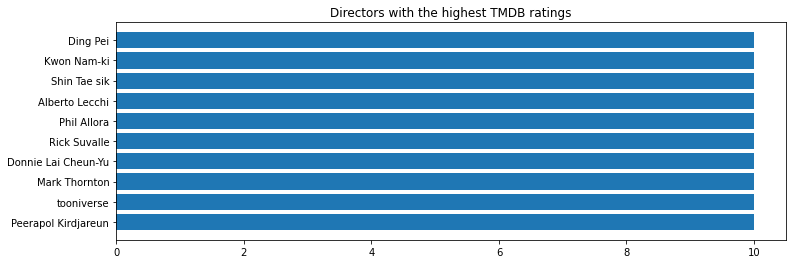

In [76]:
plt.figure(figsize=(12,4))
plt.barh(directors_df_rating.sort_values('tmdb_score', ascending=True)['name'].tail(10),directors_df_rating.sort_values('tmdb_score', ascending=True)['tmdb_score'].tail(10), align='center')
plt.title("Directors with the highest TMDB ratings")
plt.show()

## We can conclude the following:
- According to IMDB, Shows/Movies directed by Jason Hehir recieved the highest ratings followed by Bruno Stagnaro
- TMDB again gives perfect ratings to a number of Shows/Movies and thus their values are probably inaccurate

### 9) What is the relationship between country and the count of movies/shows?


In [77]:
# First we filter the credits df for only Directors
Country_df = titles_df[['id', 'production_countries']]

In [78]:
Country_df['production_countries'] = Country_df['production_countries'].apply(lambda x: literal_eval(x))
Country_df = Country_df.explode('production_countries')
Country_df['Count'] = 1
Country_df = Country_df.groupby('production_countries').Count.count().reset_index()

<ipython-input-78-8ebde11dac00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Country_df['production_countries'] = Country_df['production_countries'].apply(lambda x: literal_eval(x))


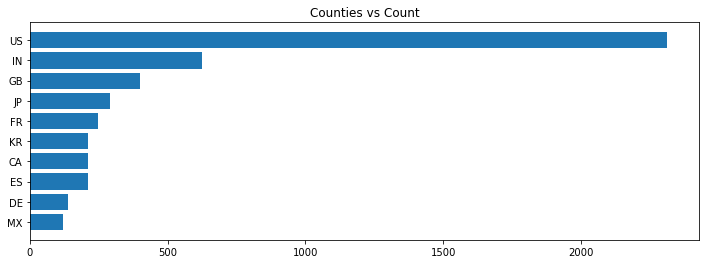

In [79]:
plt.figure(figsize=(12,4))
plt.barh(Country_df.sort_values('Count', ascending=True)['production_countries'].tail(10),Country_df.sort_values('Count', ascending=True)['Count'].tail(10), align='center')
plt.title("Counties vs Count")
plt.show()

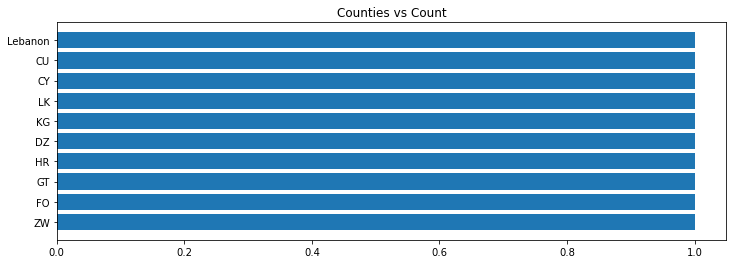

In [80]:
plt.figure(figsize=(12,4))
plt.barh(Country_df.sort_values('Count', ascending=True)['production_countries'].head(10),Country_df.sort_values('Count', ascending=True)['Count'].head(10), align='center')
plt.title("Counties vs Count")
plt.show()

## We can conclude the following:
- We can see that the US has the highest number of shows/movies created followed directly by India
- We can also see that the lowest count are all tied at 1 each

### 10) What is the movies/shows with the most and least number of votes?


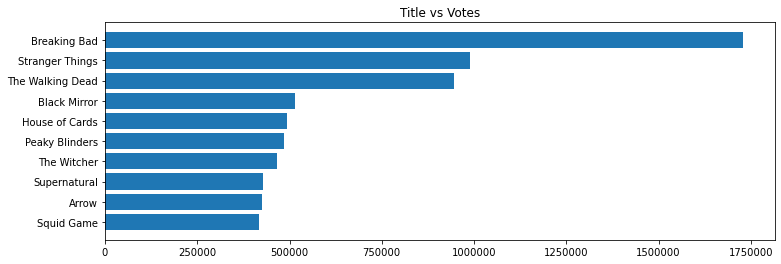

In [81]:
plt.figure(figsize=(12,4))
plt.barh(titles_df_shows.sort_values('imdb_votes', ascending=True)['title'].tail(10),titles_df_shows.sort_values('imdb_votes', ascending=True)['imdb_votes'].tail(10), align='center')
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.title("Title vs Votes")
plt.show()

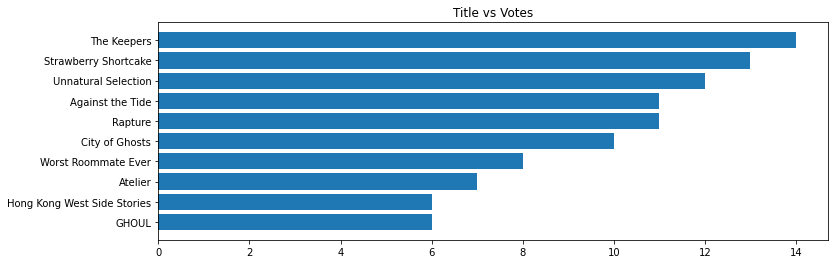

In [82]:
plt.figure(figsize=(12,4))
plt.barh(titles_df_shows.sort_values('imdb_votes', ascending=True)['title'].head(10),titles_df_shows.sort_values('imdb_votes', ascending=True)['imdb_votes'].head(10), align='center')
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.title("Title vs Votes")
plt.show()

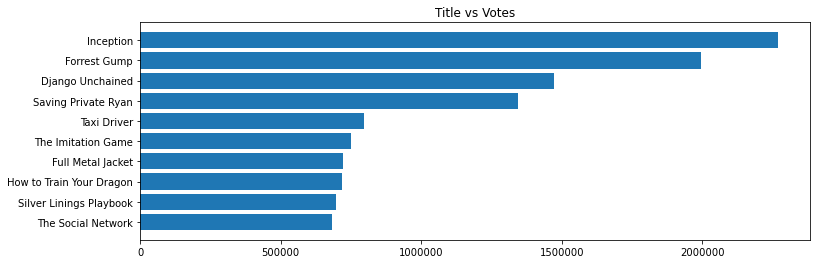

In [83]:
plt.figure(figsize=(12,4))
plt.barh(titles_df_movies.sort_values('imdb_votes', ascending=True)['title'].tail(10),titles_df_movies.sort_values('imdb_votes', ascending=True)['imdb_votes'].tail(10), align='center')
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.title("Title vs Votes")
plt.show()

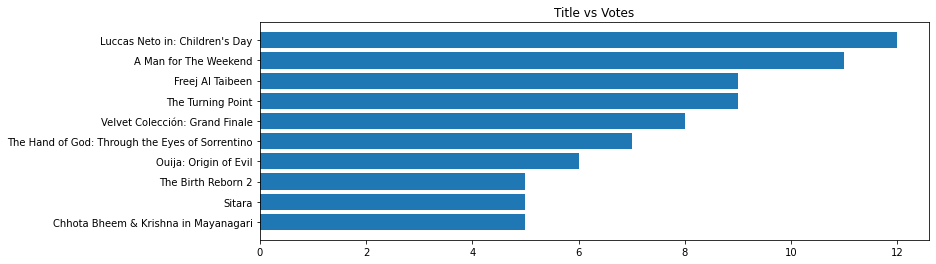

In [84]:
plt.figure(figsize=(12,4))
plt.barh(titles_df_movies.sort_values('imdb_votes', ascending=True)['title'].head(10),titles_df_movies.sort_values('imdb_votes', ascending=True)['imdb_votes'].head(10), align='center')
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.title("Title vs Votes")
plt.show()

## We can conclude the following:
- For shows, we can see that the most voted for is Breaking Bad followed by Stranger Things and the lesat voted for is GHOUL followed by Hong Kong West Side Stories
- For Movies, we can see that the most voted for is Inception Followed by Forrest Gump and the least voted for is Chhota Bheem & Krishna in Mayanagari followed by Sitara

### 11) What is the relationship between release year and popularity?


In [85]:
release_year_popularity_shows = titles_df_shows[['release_year', 'tmdb_popularity']]
release_year_popularity_movies = titles_df_movies[['release_year', 'tmdb_popularity']]

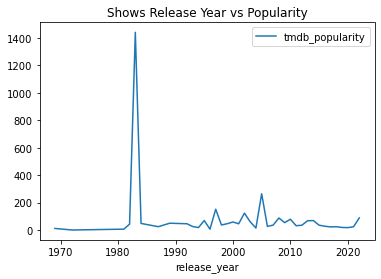

In [86]:
release_year_popularity_shows.groupby('release_year').mean().plot()
plt.title("Shows Release Year vs Popularity")
plt.show()

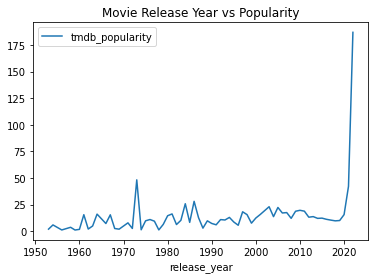

In [87]:
release_year_popularity_movies.groupby('release_year').mean().plot()
plt.title("Movie Release Year vs Popularity")
plt.show()

## We can conclude the following:
- There is a large spike in in shows popularity around the year 1982, this is probably an outlier and show be ignored.
- We can see that movies popularities also has a huge spike in 2020 this is probably due to a small number of movies being released at that time and thus is inaccurate as well.

### 12) What is the relationship between the number of seasons and run time of the show?


In [88]:
no_season_runtime = titles_df_shows[['seasons','runtime']]

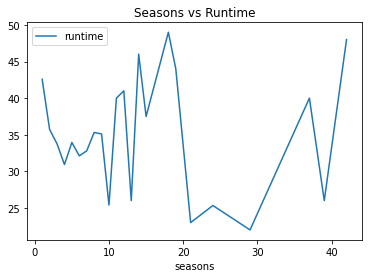

In [89]:
no_season_runtime.groupby('seasons').mean().plot()
plt.title("Seasons vs Runtime")
plt.show()

## We can conclude the following:
- We can see that between 0 to 10 season the run time seems to decrease as the number of seasons increase
- However from 10 to 20 seasons the runtime rises dramatically
- Between 20 to 30 seasons the runtime drops again sharply
- Finally between 10 to 40 the run time does tend to increase again.